# 3-1 統計解析の種類
## 3-1-1 記述統計と推論統計
## 3-1-2 この章で使用するライブラリのインポート

In [47]:
#この章で使用するライブラリ
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpla
import seaborn as sns
sns.set()
%matplotlib inline

#小数点3位までの表示
%precision 3

#Scikit-learnの線形回帰分析用のライブラリ
from sklearn import linear_model

# 3-2 データの読み込みと対話
## 3-2-1 インターネットなどで配布されている対象データの読み込み
### 1-1 カレントディレクトリの確認

In [48]:
cd ~/Github/Python/ut_datascience_ikusei_kouza/chapter03/

/Users/yabukirento/Github/Python/ut_datascience_ikusei_kouza/chapter03


In [93]:
pwd

'/Users/yabukirento/Github/Python/ut_datascience_ikusei_kouza/chapter03/chap3'

## 1-2 ディレクトリの作成と移動

In [94]:
#無限にファイルを作成してしまうので消去
#mkdir chap3

In [51]:
cd chap3/

/Users/yabukirento/Github/Python/ut_datascience_ikusei_kouza/chapter03/chap3


### 1-3 サンプルデータのダウンロード
### 1-4 webからデータを取得したり、zipファイルを扱うためのライブラリ

requests : webのデータの送受信

zipfile : ZIP形式ファイルを扱うためのライブラリ

io : ファイルの読み書き

In [100]:
import requests, zipfile
from io import StringIO
import io

### 1-5 ZIPファイルをダウンロードして展開する

In [102]:
#データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

#データをurlから取得する
r = requests.get(url, stream=True)

#zipファイルを読み書きする
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [54]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


## 3-2-2 データの読み込みと確認
### 2-1 データをDataFrameとして読み込む

In [106]:
#データをDataframeとして読み込む
student_data_math = pd.read_csv('student-mat.csv')

### 2-2 データを確認する

In [108]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


### 2-3 カンマで区切ってデータを読む

In [109]:
#データの読み込み
#区切りに;がついているので要注意

student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [110]:
#?pd.read_csv

## 3-2-3 データの性質を確認する
### 3-1 データの個数や型を確認する

In [112]:
#データの性質の確認

#すべてのカラムの情報などをチェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 3-2-4 量的データと質的データ
### 4-1 量的データと質的データの例

In [113]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [115]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

### 4-2 軸別に平均値を求める

In [118]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

# 3-3 記述統計
## 3-3-1 ヒストグラム

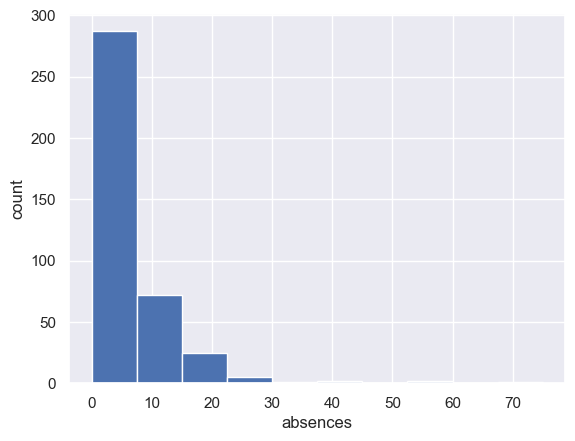

In [121]:
#histgram データの指定
plt.hist(student_data_math['absences'])

#x軸とy軸のラベル
plt.xlabel('absences')
plt.ylabel('count')

#グリッドをつける
plt.grid(True)

## 3-3-2 平均、中央値、最頻値

In [122]:
#平均値・中央値・最頻値
print('平均値;', student_data_math['absences'].mean())
print('中央値;', student_data_math['absences'].median())
print('最頻値;', student_data_math['absences'].mode())

平均値; 5.708860759493671
中央値; 4.0
最頻値; 0    0
Name: absences, dtype: int64


## 3-3-3 分散と標準偏差

In [123]:
#分散
student_data_math['absences'].var(ddof=0)

63.887

In [124]:
#標準偏差(=分散の平方こん)
student_data_math['absences'].std(ddof=0)

7.993

In [125]:
#平方根は以下の方法でも求められる
np.sqrt(student_data_math['absences'].var())

8.003

### 3-3-4 要約統計量とパーセントタイル

In [128]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

### 4-1 四分位範囲を求める

In [130]:
student_data_math['absences'].describe().iloc[6] - student_data_math['absences'].describe().iloc[4] 

8.000

### 4-2 全列を対象とした結果を求める

In [131]:
#ようやく統計量をまとめて
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 3-3-5 箱ひげ図

{'whiskers': [<matplotlib.lines.Line2D at 0x1429a8150>,
 'caps': [<matplotlib.lines.Line2D at 0x141613b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1429ab2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x141612a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1429b3e50>],
 'means': []}

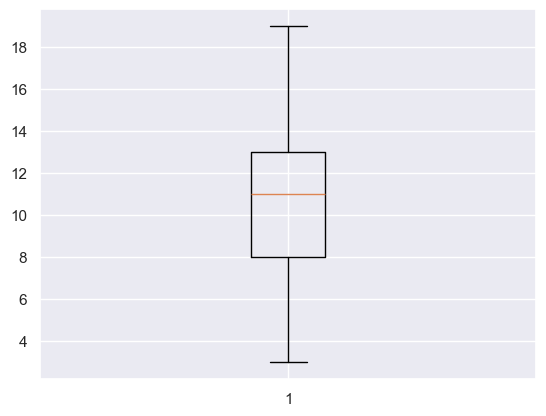

In [133]:
#箱ひげ図の表示 : G1
plt.boxplot(student_data_math['G1'])

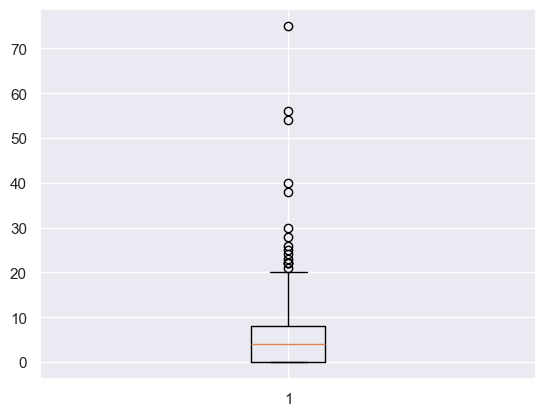

In [134]:
#箱ひげ図 : 欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

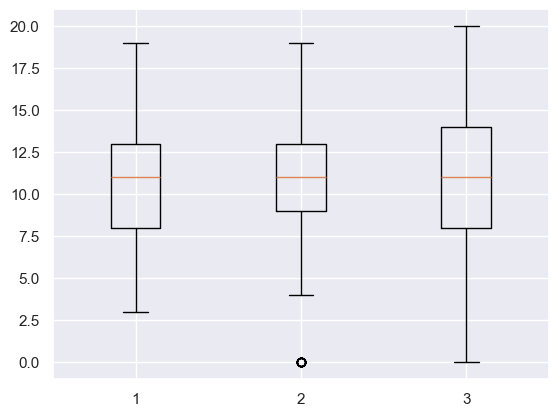

In [135]:
#箱ひげ図：G1, G2, G3
plt.boxplot([student_data_math['G1'],student_data_math['G2'],student_data_math['G3']]) 
plt.grid(True)

## 3-3-6 変動係数

In [137]:
#変動係数 : 標準偏差を平均値で割る　：　異なるスケールのデータの散らばり具合を比較したい
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

In [138]:
#一気に変動係数を表示する
numeric_data = student_data_math.select_dtypes(include=[np.number])
numeric_data.std() / numeric_data.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

## 3-3-7 散布図と相関係数

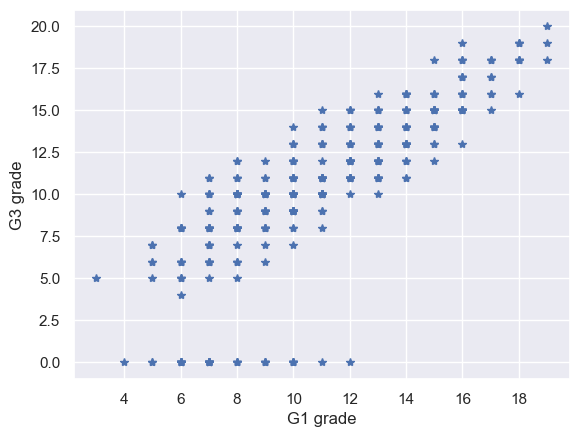

In [73]:
#散布図と相関係数

#散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], '*')

#ラベル
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

#散布図オプション一覧 by chatGPT
# '-'：実線
# '--'：破線
# ':'：点線
# '-.'：一点鎖線
# '.'：点
# ','：ピクセル
# 'o'：円
# 'v'：下向きの三角形
# '^'：上向きの三角形
# '<'：左向きの三角形
# '>'：右向きの三角形
# '1'：下向きの三角形の上に縦向きの線
# '2'：上向きの三角形の下に縦向きの線
# '3'：左向きの三角形の右に横向きの線
# '4'：右向きの三角形の左に横向きの線
# 's'：正方形
# 'p'：五角形
# '*'：星
# 'h'：六角形1
# 'H'：六角形2
# '+'：プラス記号
# 'x'：X字
# 'D'：菱形
# 'd'：細かい菱形
# '_'：横向きの線

### 7-1 共分散

In [141]:
#共分散行列
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [142]:
#分散
print('G1の分散:', student_data_math['G1'].var())
print('G3の分散:', student_data_math['G3'].var())

G1の分散: 11.017053267364899
G3の分散: 20.989616397866737


### 7-2 相関係数

In [143]:
#相関係数
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

PearsonRResult(statistic=0.8014679320174132, pvalue=9.001430312283913e-90)

In [144]:
#相関行列
np.corrcoef(student_data_math['G1'], student_data_math['G3'])

array([[1.   , 0.801],
       [0.801, 1.   ]])

## 3-3-8全てのヒストグラムや散布図をかく

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

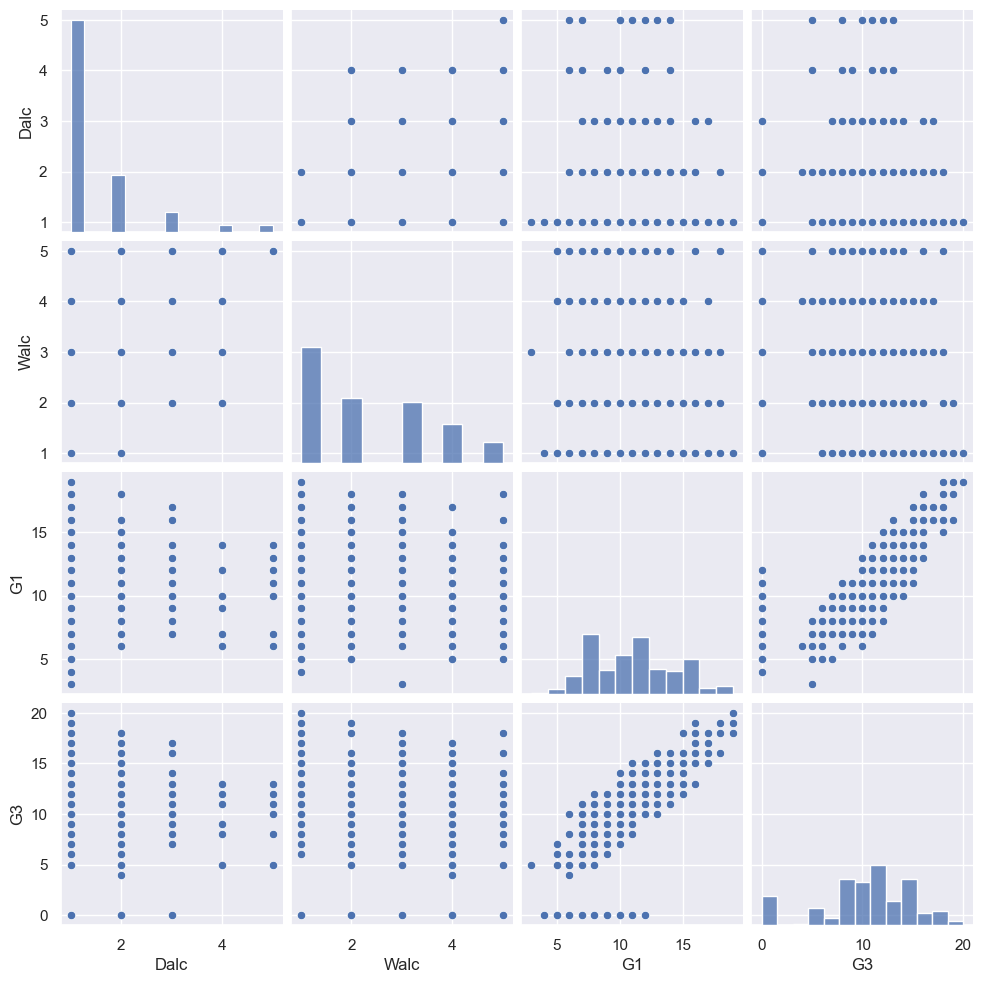

In [148]:
sns.pairplot(student_data_math[['Dalc', 'Walc','G1','G3']])
plt.grid(True)

In [79]:
#週末にアルコールを飲む人の1期目の成績の平均値
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

## 練習問題

## 練習問題3-1: ポルトガル語の成績データを読み込んで要約統計量を表示

In [149]:
student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## 練習問題3-2 : 以下の変数をキーとして、数学とポルトガル語の情報をマージ。両方にデータがある情報のみ残す

In [81]:
merged_math_por = pd.merge(student_data_math, student_data_por, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus','Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery','internet'], suffixes=('_math', '_por'), how='inner')
merged_math_por.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [82]:
merged_math_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 練習問題3-3

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


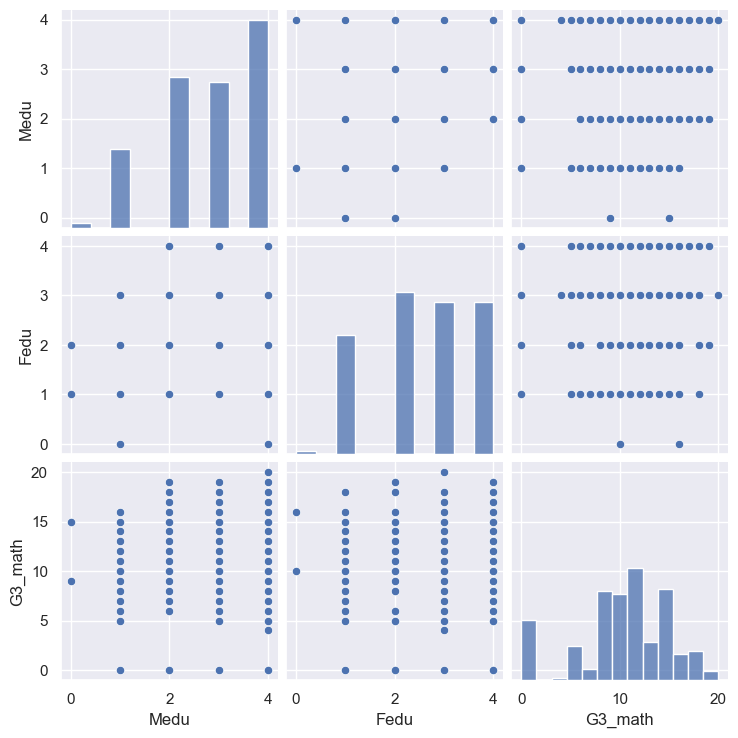

In [151]:
sns.pairplot(merged_math_por[['Medu', 'Fedu', 'G3_math']])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


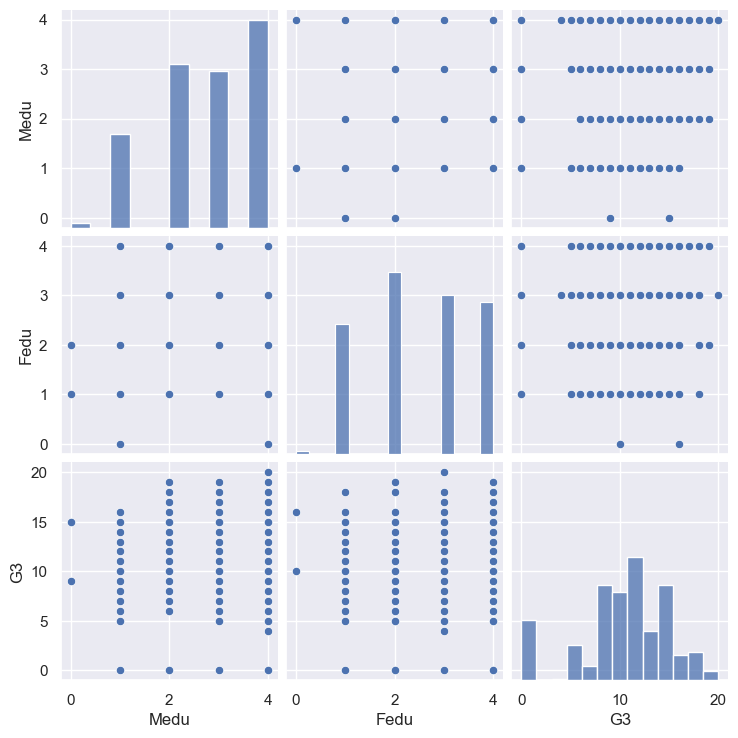

In [152]:
sns.pairplot(student_data_math[['Medu', 'Fedu', 'G3']])

# 3-4 単回帰分析

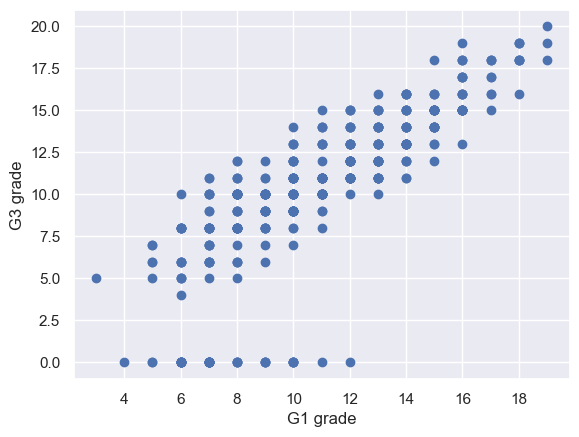

In [153]:
#散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

## 3-4-1 線形単回帰分析

In [154]:
# 線形単回帰分析
from sklearn import linear_model

# 線形回帰のインスタンスを作成
reg = linear_model.LinearRegression()


In [155]:
#説明変数に1期目の数学の成績を利用
#locはデータフレームから、列と行を指定して取り出す。loc[:, ['G1']]はG1列の全てを取り出す操作
#valudesに直しているので注意

X = student_data_math.loc[:, ['G1']].values

#目的変数に最終の数学の成績を利用
Y = student_data_math['G3'].values

#予測モデルを計算、ここでa,bを算出
reg.fit(X, Y)

#回帰係数
print('回帰係数:', reg.coef_)

#切片
print('切片:', reg.intercept_)

回帰係数: [1.106]
切片: -1.6528038288004474


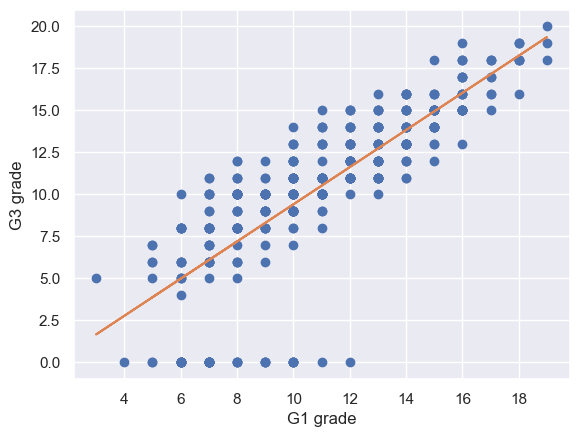

In [156]:
#先ほどの散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

#その上に線形回帰直線を引く
plt.plot(X, reg.predict(X))
plt.grid(True)

## 3-4-2 決定係数

In [157]:
#決定係数、寄与率とも言われる
print('決定係数:', reg.score(X, Y))

決定係数: 0.6423508460522701


## 練習問題
### 練習問題3-4 : ポルトガル語の成績でも単回帰分析

In [164]:
#説明変数に1期目の数学の成績を利用
#locはデータフレームから、列と行を指定して取り出す。loc[:, ['G1']]はG1列の全てを取り出す操作
#valudesに直しているので注意

X = student_data_por.loc[:, ['G1']].values

#目的変数に最終の数学の成績を利用
Y = student_data_por['G3'].values

#予測モデルを計算、ここでa,bを算出
reg.fit(X, Y)

#回帰係数
print('回帰係数:', reg.coef_)

#切片
print('切片:', reg.intercept_)

#決定係数、寄与率とも言われる
print('決定係数:', reg.score(X, Y))

回帰係数: [0.973]
切片: 0.8203984121064618
決定係数: 0.6829156800171083


### 練習問題 3-5

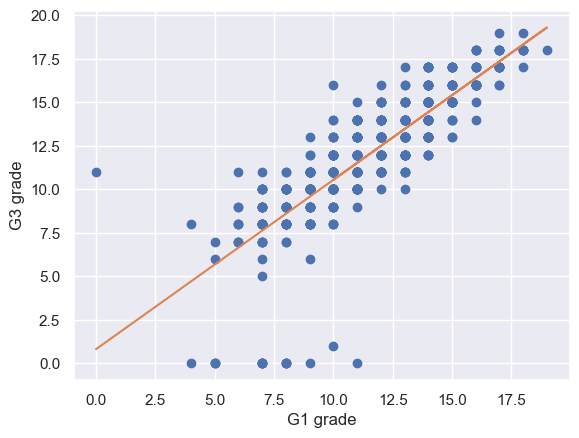

In [165]:
#散布図の上に線形回帰直線を引く
plt.plot(student_data_por['G1'], student_data_por['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.plot(X, reg.predict(X))
plt.grid(True)

### 練習問題3-6 : 目的変数を変えず、説明変数を欠席数に

回帰係数: [-0.064]
切片: 12.138800862687443
決定係数: 0.008350131955637385


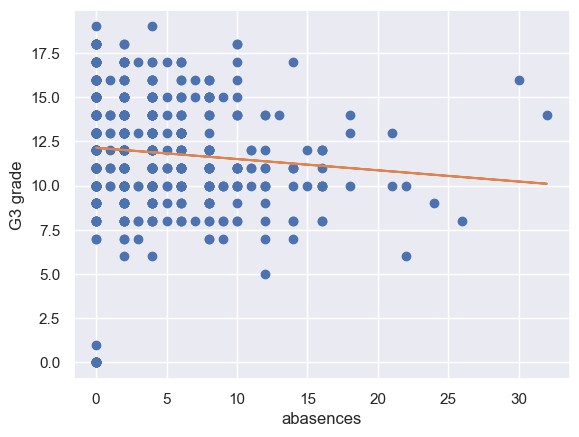

In [169]:
#locはデータフレームから、列と行を指定して取り出す。loc[:, ['G1']]はG1列の全てを取り出す操作
#valudesに直しているので注意

X = student_data_por.loc[:, ['absences']].values

#目的変数に最終の数学の成績を利用
Y = student_data_por['G3'].values

#予測モデルを計算、ここでa,bを算出
reg.fit(X, Y)

#回帰係数
print('回帰係数:', reg.coef_)

#切片
print('切片:', reg.intercept_)

#決定係数、寄与率とも言われる
print('決定係数:', reg.score(X, Y))

#練習問題 3-5
#散布図の上に線形回帰直線を引く
plt.plot(student_data_por['absences'], student_data_por['G3'], 'o')
plt.xlabel('abasences')
plt.ylabel('G3 grade')
plt.plot(X, reg.predict(X))
plt.grid(True)

# 3章総合問題
## 総合問題3-1 統計の基礎と可視化

In [185]:
pwd

'/Users/yabukirento/Github/Python/ut_datascience_ikusei_kouza/chapter03/chap3'

In [186]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_quality = pd.read_csv(url, sep=';')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 問1 ようやく統計量を算出せよ

In [187]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


csvファイルとして出力してみる

In [193]:
wine_quality.describe().to_csv('/Users/yabukirento/Github/Python/ut_datascience_ikusei_kouza/chapter03/chap3/wine_quality_describe.csv')

正しく出力されたか確認

In [194]:
ls

student-mat.csv            student.txt
student-merge.R            wine_quality_describe
student-por.csv            wine_quality_describe.csv


データの性質を確認してみる

In [195]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 問2 それぞれの分布と変数同士の関係性がわかるようにグラフ化してみる

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

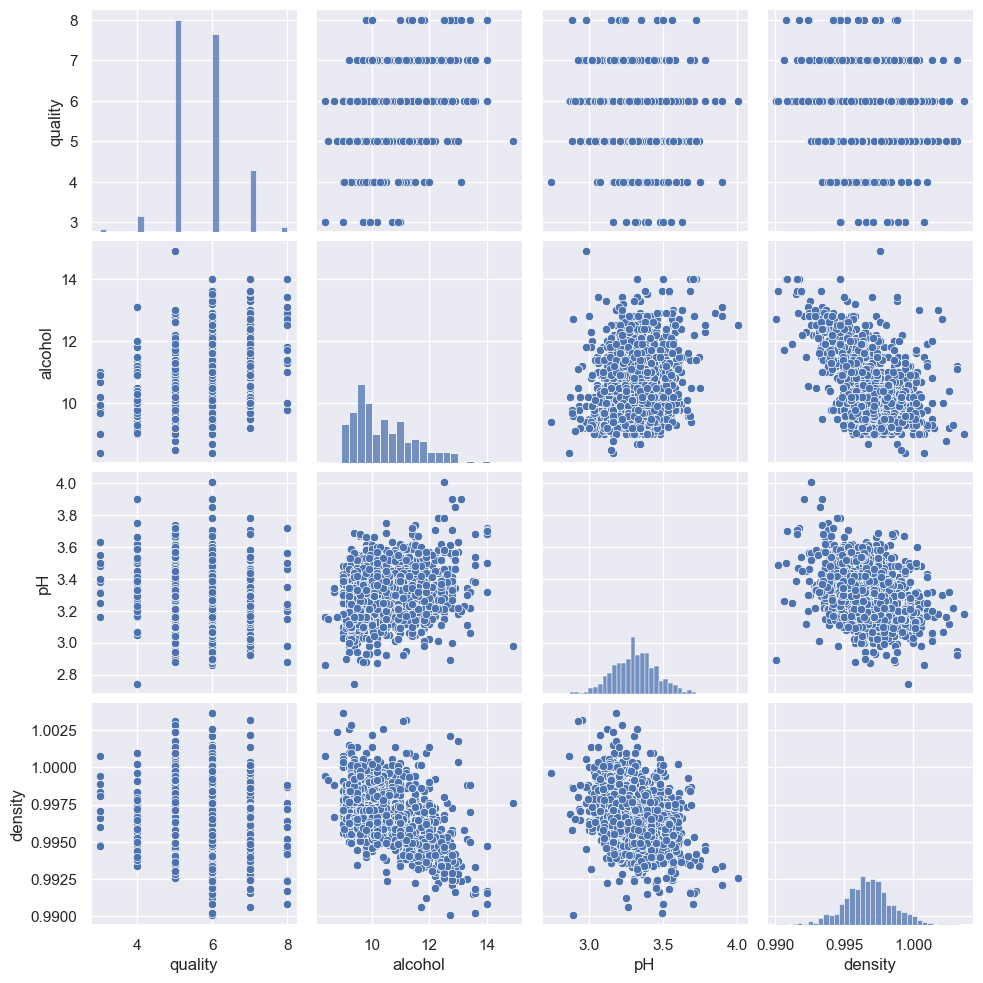

In [196]:
sns.pairplot(wine_quality[['quality', 'alcohol','pH','density']])
plt.grid(True)

## 総合問題3-2 ローレンツ曲線とジニ係数化

### 問1 1期目の数学データについて、男女別にローレンツ曲線を求めてください

In [206]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [207]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [208]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [215]:
sorted_data = student_data_math.groupby('sex').apply(lambda x: x.sort_values('G1')).reset_index(drop=True)
sorted_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,16,U,GT3,T,3,4,at_home,other,...,2,4,3,1,2,3,12,5,5,5
4,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,7,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,GP,M,15,U,LE3,T,4,2,teacher,other,...,3,5,2,1,1,3,10,18,19,19
391,GP,M,16,R,GT3,T,4,4,teacher,teacher,...,3,5,5,2,5,4,8,18,18,18
392,GP,M,16,U,GT3,T,2,1,other,other,...,4,3,3,1,1,4,6,18,18,18
393,GP,M,15,U,GT3,T,4,4,services,teacher,...,4,3,3,1,1,5,2,19,18,18


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(b

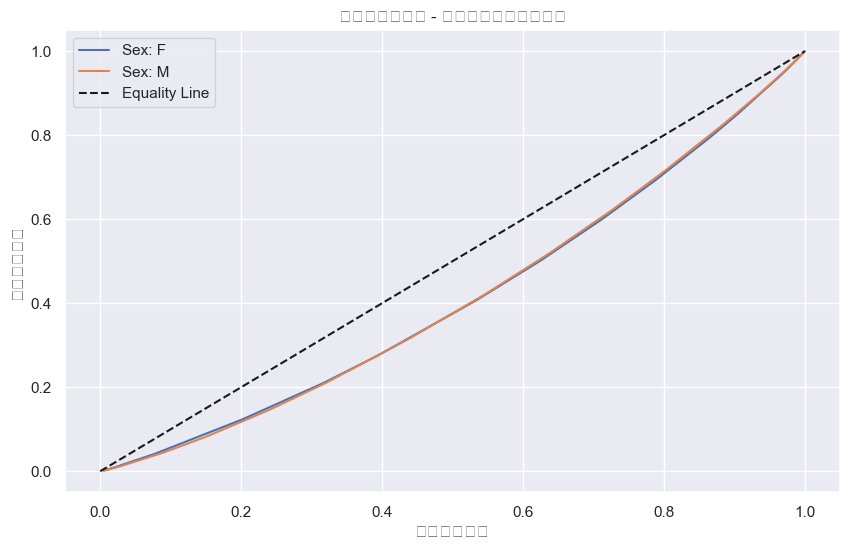

In [216]:
# 累積比率の計算
def calculate_cumulative_ratio(group):
    group['cumulative_students_ratio'] = np.arange(1, len(group) + 1) / len(group)
    group['cumulative_scores_ratio'] = group['G1'].cumsum() / group['G1'].sum()
    return group

cumulative_data = sorted_data.groupby('sex').apply(calculate_cumulative_ratio).reset_index(drop=True)

# ローレンツ曲線の描画
plt.figure(figsize=(10, 6))

for sex, group in cumulative_data.groupby('sex'):
    plt.plot(group['cumulative_students_ratio'], group['cumulative_scores_ratio'], label=f'Sex: {sex}')

plt.plot([0, 1], [0, 1], 'k--', label='Equality Line')

plt.xlabel('累積人数比率')
plt.ylabel('累積点数比率')
plt.title('ローレンツ曲線 - 性別ごとの数学の点数')
plt.legend()
plt.grid(True)
plt.show()

### 問2 男女の1期目の成績について、ジニ係数をそれぞれ求めて

In [217]:
# ジニ係数を計算する関数
def gini_coefficient(x):
    # 昇順にソート
    sorted_x = np.sort(x)
    n = len(x)
    cumulative_sum = np.cumsum(sorted_x)
    relative_cumulative_sum = cumulative_sum / cumulative_sum[-1]
    gini = 1 - (2 * np.sum(relative_cumulative_sum) - 1) / n
    return gini

# 性別ごとにグループ化し、G1列に対してジニ係数を計算
gini_by_sex = student_data_math.groupby('sex')['G1'].apply(gini_coefficient).reset_index()

# 結果を表示
print(gini_by_sex)

  sex        G1
0   F  0.172378
1   M  0.171974
